<a href="https://colab.research.google.com/github/puxxbu/JavaGitTest/blob/master/TUBES_PMDPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

data = pd.read_csv('/content/water_potability.csv')
data.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


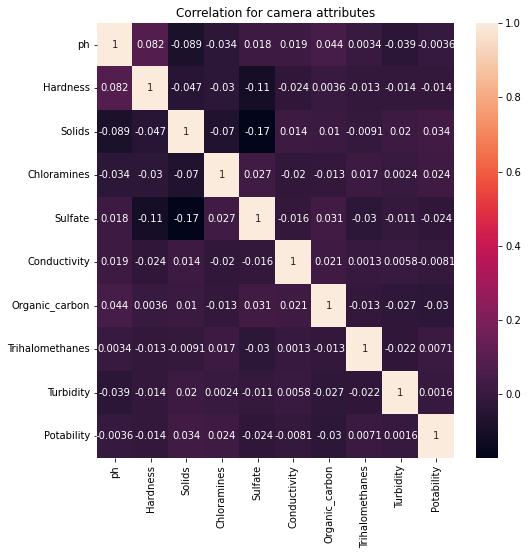

In [ ]:
import seaborn as sns


df_corr=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax)
plt.title('Correlation for camera attributes')
plt.show()

In [ ]:
#Melakukan pengecekan data duplikat 

result_data = data.drop_duplicates()

In [ ]:
# Menampilkan data median,mean pada dataset

result_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# Mencari kolom yang memiliki data null
# Melakukan replace data null dengan rata-rata dari kolom tersebut

# Sebelum dilakukan replace data
print(result_data.isnull().sum())

result_data['ph'].fillna(result_data['ph'].mean(), inplace=True)
result_data['Sulfate'].fillna(result_data['Sulfate'].mean(), inplace=True)
result_data['Trihalomethanes'].fillna(result_data['Trihalomethanes'].mean(), inplace=True)


# Setelah dilakukan replace data
print("\n")
print(result_data.isnull().sum())



ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split 

X = result_data.iloc[:, :-1]
print(X)
y = result_data.iloc[:, -1]
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.metrics as sm

standard_scaler = StandardScaler()

X_standarScaled =  standard_scaler.fit_transform(X)




In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mmscaled = mm_scaler.transform(X_train)
X_test_mmscaled = mm_scaler.transform(X_test)


In [ ]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=5)
X_train_selected = selector.fit_transform(X_train_mmscaled,y_train)
X_test_selected = selector.fit_transform(X_test_mmscaled,y_test)
features= [f for f,s in zip(X.columns, selector.get_support()) if s]



print("The selected features are: ")
print(features)

The selected features are: 
['ph', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon']


In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter=10000)
LogReg.fit(X_train_mmscaled,y_train)
print("Score with all features: {:.3f}".format(LogReg.score(X_test_mmscaled,y_test)))

LogReg.fit(X_train_selected,y_train)
print("Score with only selected features: {:.3f}".format(
    LogReg.score(X_test_selected,y_test)))


Score with all features: 0.628
Score with only selected features: 0.628


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selectM = SelectFromModel(
    RandomForestClassifier(n_estimators=100),
    threshold="mean")


X_train_selected = selectM.fit_transform(X_train_mmscaled,y_train)
X_test_selected = selectM.fit_transform(X_test_mmscaled,y_test)
features= [f for f,s in zip(X.columns, selectM.get_support()) if s]



print("The selected features are: ")
print(features)


The selected features are: 
['Hardness', 'Chloramines', 'Conductivity', 'Organic_carbon']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline




GBT = GradientBoostingClassifier(n_estimators=300)
GBT.fit(X_train,y_train)
print("Training set score:",GBT.score(X_train,y_train))
print("Test set score:",GBT.score(X_test,y_test))

# Membuat objek pipeline menggunakan preprocessing MinMaxScaler dan Classifier GradientBoostingClassifier
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', GBT)])

pipe.fit(X_train, y_train)
# print("Test Score: {:.2f}".format(pipe.score(X_test, y_test)))
print("Test Score: ",pipe.score(X_test, y_test))




Training set score: 0.8492366412213741
Test set score: 0.6615853658536586
Test Score:  0.6600609756097561


In [ ]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__C': [0.001, 0.01, 0.1, 1]},
    {'classifier': [GradientBoostingClassifier(n_estimators=300)],
    'preprocessing': [None], 'classifier__max_depth': [3,4,5]}]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best estimator:\n{}".format(grid.best_estimator_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best estimator steps:\n{}".format(
        grid.best_estimator_.named_steps['classifier']))

Best params:
{'classifier': SVC(C=1, gamma=0.1), 'classifier__C': 1, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler()}

Best estimator:
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', SVC(C=1, gamma=0.1))])
Best cross-validation score: 0.67
Test-set score: 0.68
Best estimator steps:
SVC(C=1, gamma=0.1)


              precision    recall  f1-score   support

 Not Potable       0.68      0.94      0.79       412
     Potable       0.71      0.26      0.38       244

    accuracy                           0.68       656
   macro avg       0.69      0.60      0.58       656
weighted avg       0.69      0.68      0.64       656



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

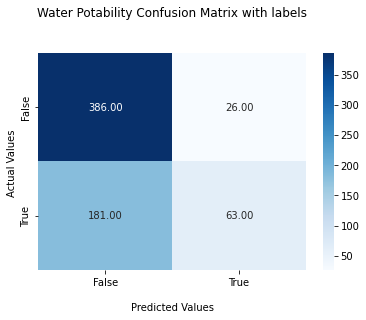

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = grid.predict(X_test)

print(classification_report(y_test, pred, target_names = ['Not Potable', 'Potable'] ))


ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f' , cmap='Blues')

ax.set_title('Water Potability Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


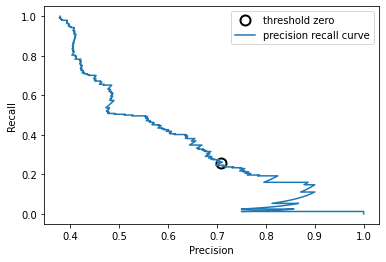

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label = "precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

AUC for Best Model : 0.663


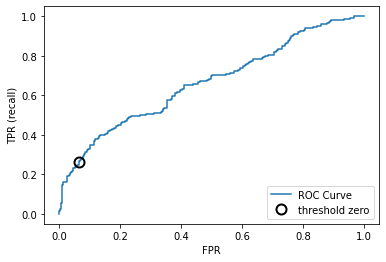

In [ ]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
fpr, tpr, thresholds = roc_curve(y_test, grid.best_estimator_.decision_function(X_test))

plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

from sklearn.metrics import roc_auc_score
best_auc = roc_auc_score(y_test, grid.best_estimator_.decision_function(X_test))
print("AUC for Best Model : {:.3f}".format(best_auc))

In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import cross_val_score

mod = []
cv_score=[]
model =[ GradientBoostingClassifier(), SVC()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])




,model,cv_score
1,SVC(),0.605344
0,GradientBoostingClassifier(),0.636641


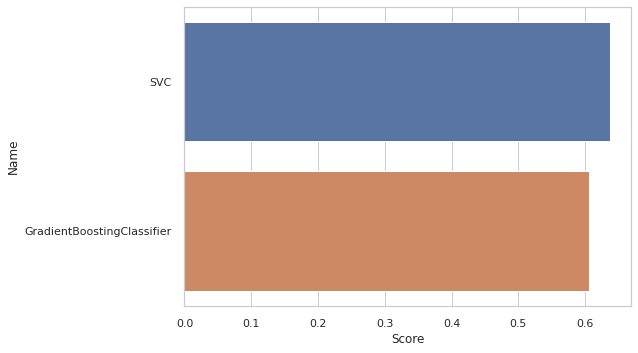

In [ ]:
data_model = pd.DataFrame()
data_model['Name'] = ['SVC','GradientBoostingClassifier']
data_model['Score'] = cv_score

cm = sns.light_palette("green", as_cmap=True)
s = data_model.style.background_gradient(cmap=cm)
s

sns.set(style="whitegrid")
tes = sns.barplot(y="Name", x="Score", data=data_model)
